# Projet IA - MGL869
## Import du jeu de données

In [1]:
import numpy as np # algèbre linéaire
import pandas as pd # traitement des données, I/O de fichier CSV (par ex. pd.read_csv)
import seaborn as sns # bibliothèque de tracé qui utilise matplot
import matplotlib.pyplot as plt # pour tracer certains paramètres dans seaborn
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("data/ObesityDataSet_raw_and_data_sinthetic.csv", dtype={
  'Gender':'category',
  'CAEC':'category',
  'CALC':'category',
  'MTRANS':'category',
  'NObeyesdad':'category',
})
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

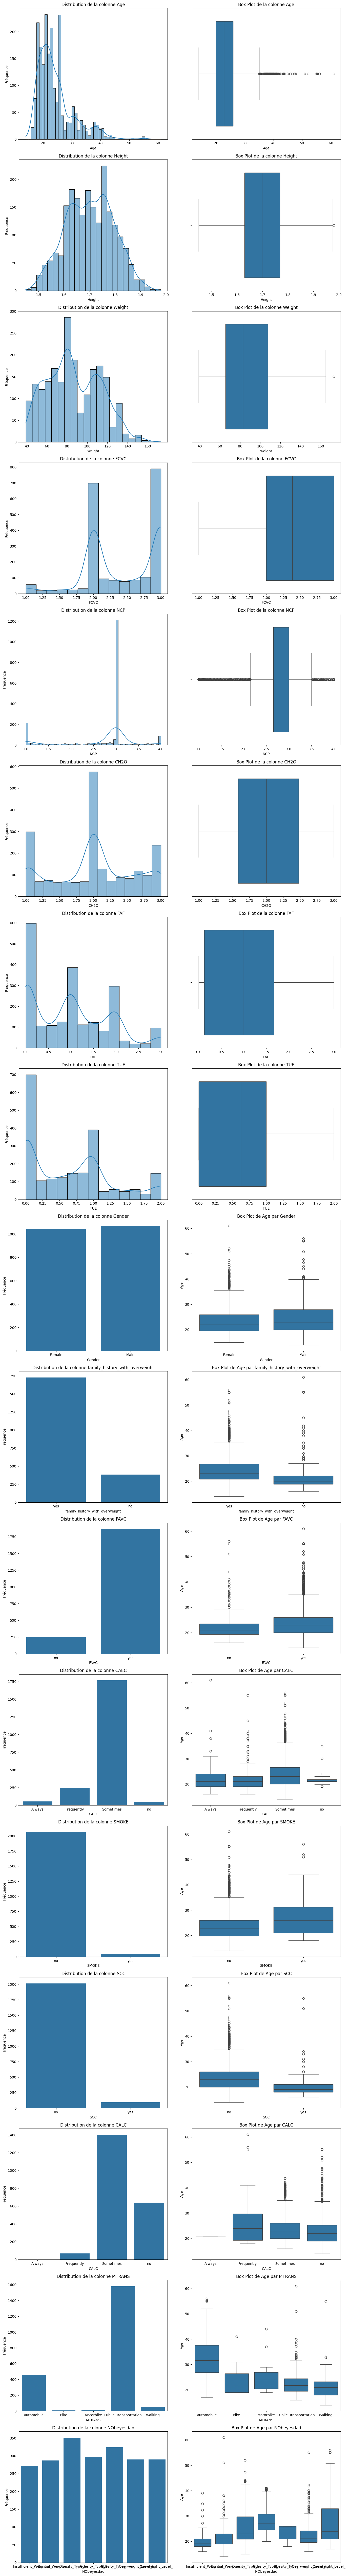

In [2]:
def plot_distributions(dataframe):
    num_cols = dataframe.select_dtypes(include=["float64", "int64"]).columns
    cat_cols = dataframe.select_dtypes(include=["object", "category"]).columns

    total_plots = len(num_cols) + len(cat_cols)
    fig, axes = plt.subplots(total_plots, 2, figsize=(14, 6 * total_plots))

    if total_plots == 1:
        axes = [axes]

    plot_idx = 0
    for col in num_cols:
        sns.histplot(dataframe[col], kde=True, ax=axes[plot_idx][0])
        axes[plot_idx][0].set_title(f"Distribution de la colonne {col}")
        axes[plot_idx][0].set_xlabel(col)
        axes[plot_idx][0].set_ylabel("Fréquence")

        sns.boxplot(x=dataframe[col], ax=axes[plot_idx][1])
        axes[plot_idx][1].set_title(f"Box Plot de la colonne {col}")
        axes[plot_idx][1].set_xlabel(col)

        plot_idx += 1

    for col in cat_cols:
        sns.countplot(x=dataframe[col], ax=axes[plot_idx][0])
        axes[plot_idx][0].set_title(f"Distribution de la colonne {col}")
        axes[plot_idx][0].set_xlabel(col)
        axes[plot_idx][0].set_ylabel("Fréquence")

    
        if len(num_cols) > 0:
            sns.boxplot(
                x=dataframe[col], y=dataframe[num_cols[0]], ax=axes[plot_idx][1]
            )
            axes[plot_idx][1].set_title(f"Box Plot de {num_cols[0]} par {col}")
            axes[plot_idx][1].set_xlabel(col)
            axes[plot_idx][1].set_ylabel(num_cols[0])
        else:
            axes[plot_idx][1].text(
                0.5,
                0.5,
                "Pas de données numériques disponibles",
                horizontalalignment="center",
                verticalalignment="center",
                transform=axes[plot_idx][1].transAxes,
            )
            axes[plot_idx][1].set_title(f"Box Plot de {col}")
            axes[plot_idx][1].set_xlabel(col)
            axes[plot_idx][1].set_ylabel("Valeurs")

        plot_idx += 1

    plt.tight_layout()
    plt.show()


plot_distributions(df)

### Supprimer valeurs manquantess

In [3]:
df.dropna(inplace=True)

## Préparation du jeu de données
### Création d'un nouveau df

In [4]:
df2 = df.copy()

### Transformation colonne numerique en colonne categorielle

In [5]:
df2["family_history_with_overweight"] = df["family_history_with_overweight"].map({"yes": True, "no": False})
df2["FAVC"] = df["FAVC"].map({"yes": True, "no": False})
df2["SMOKE"] = df["SMOKE"].map({"yes": True, "no": False})
df2["SCC"] = df["SCC"].map({"yes": True, "no": False})

### Rapport sur les données numériques

In [6]:
df2.describe()

Age       Height       Weight         FCVC          NCP  \
count  2111.000000  2111.000000  2111.000000  2111.000000  2111.000000   
mean     24.312600     1.701677    86.586058     2.419043     2.685628   
std       6.345968     0.093305    26.191172     0.533927     0.778039   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.947192     1.630000    65.473343     2.000000     2.658738   
50%      22.777890     1.700499    83.000000     2.385502     3.000000   
75%      26.000000     1.768464   107.430682     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2111.000000  2111.000000  2111.000000  
mean      2.008011     1.010298     0.657866  
std       0.612953     0.850592     0.608927  
min       1.000000     0.000000     0.000000  
25%       1.584812     0.124505     0.000000  
50%       2.000000     1.000000     0.625350  
75%       2.477420     1.666678     1.000000  
max       3.000000     3.000000     2.000000

In [7]:
df2["CALC"].value_counts()

CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

### Age

C:\Users\felix\AppData\Local\Temp\ipykernel_40808\1978995442.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cdf.replace({False: -1, True: 1}, inplace=True)


<Axes: >

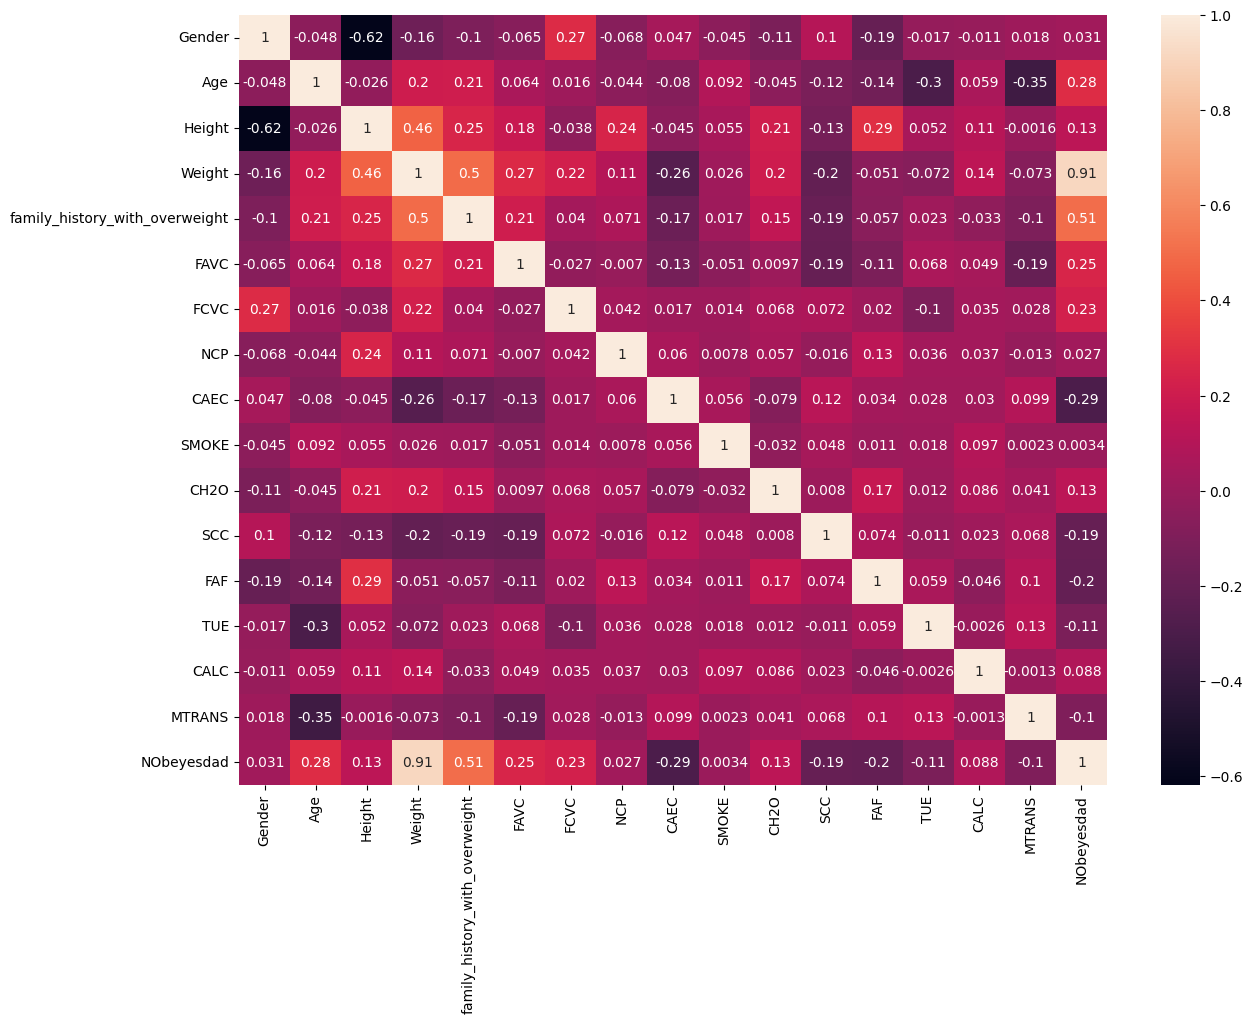

In [8]:
cdf = pd.DataFrame(df2)
cdf.replace({False: -1, True: 1}, inplace=True)
cdf["Gender"] = cdf["Gender"].map({"Male": -1, "Female": 1}).astype(int)
cdf["CALC"] = cdf["CALC"].map({"no": 0, "Sometimes": 3, "Frequently": 10, "Always": 30}).astype(int)
cdf["CAEC"] = cdf["CAEC"].map({"no": 0, "Sometimes": 3, "Frequently": 10, "Always": 30}).astype(int)
cdf["MTRANS"] = cdf["MTRANS"].map({
    "Walking": 10,
    "Bike": 15,
    "Public_Transportation": 3,
    "Motorbike": 3,
    "Automobile": 1,
}).astype(int)
cdf["NObeyesdad"] = cdf["NObeyesdad"].map({
    "Insufficient_Weight": -1,
    "Normal_Weight": 0,
    "Overweight_Level_I": 1,
    "Overweight_Level_II": 2,
    "Obesity_Type_I": 3,
    "Obesity_Type_II": 4,
    "Obesity_Type_III": 5,
}).astype(float)
corr = cdf.select_dtypes('number').corr(method="pearson")
plt.figure(figsize = (14, 10))
df3 = cdf
df3["NObeyesdad"] = df2["NObeyesdad"]
sns.heatmap(corr, annot=True)

### Apercu des données traitées

In [9]:
df3

Gender        Age    Height      Weight  family_history_with_overweight  \
0          1  21.000000  1.620000   64.000000                               1   
1          1  21.000000  1.520000   56.000000                               1   
2         -1  23.000000  1.800000   77.000000                               1   
3         -1  27.000000  1.800000   87.000000                              -1   
4         -1  22.000000  1.780000   89.800000                              -1   
...      ...        ...       ...         ...                             ...   
2106       1  20.976842  1.710730  131.408528                               1   
2107       1  21.982942  1.748584  133.742943                               1   
2108       1  22.524036  1.752206  133.689352                               1   
2109       1  24.361936  1.739450  133.346641                               1   
2110       1  23.664709  1.738836  133.472641                               1   

      FAVC  FCVC  NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0       -1   2.0  3.0     3     -1  2.000000   -1  0.000000  1.000000     0   
1       -1   3.0  3.0     3      1  3.000000    1  3.000000  0.000000     3   
2       -1   2.0  3.0     3     -1  2.000000   -1  2.000000  1.000000    10   
3       -1   3.0  3.0     3     -1  2.000000   -1  2.000000  0.000000    10   
4       -1   2.0  1.0     3     -1  2.000000   -1  0.000000  0.000000     3   
...    ...   ...  ...   ...    ...       ...  ...       ...       ...   ...   
2106     1   3.0  3.0     3     -1  1.728139   -1  1.676269  0.906247     3   
2107     1   3.0  3.0     3     -1  2.005130   -1  1.341390  0.599270     3   
2108     1   3.0  3.0     3     -1  2.054193   -1  1.414209  0.646288     3   
2109     1   3.0  3.0     3     -1  2.852339   -1  1.139107  0.586035     3   
2110     1   3.0  3.0     3     -1  2.863513   -1  1.026452  0.714137     3   

      MTRANS           NObeyesdad  
0          3        Normal_Weight  
1          3        Normal_Weight  
2          3        Normal_Weight  
3         10   Overweight_Level_I  
4          3  Overweight_Level_II  
...      ...                  ...  
2106       3     Obesity_Type_III  
2107       3     Obesity_Type_III  
2108       3     Obesity_Type_III  
2109       3     Obesity_Type_III  
2110       3     Obesity_Type_III  

[2111 rows x 17 columns]

#### 

In [10]:
df3.dtypes

Gender                               int32
Age                                float64
Height                             float64
Weight                             float64
family_history_with_overweight       int64
FAVC                                 int64
FCVC                               float64
NCP                                float64
CAEC                                 int32
SMOKE                                int64
CH2O                               float64
SCC                                  int64
FAF                                float64
TUE                                float64
CALC                                 int32
MTRANS                               int32
NObeyesdad                        category
dtype: object

### Partitionnement des données

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

df4 = pd.DataFrame(df3)
X = df4.drop(['NObeyesdad', 'Weight', 'Height'], axis=1)
X_columns = X.columns
y = df4['NObeyesdad']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


### Modele : RandomForest

In [13]:
"""param_grid = {
    'n_estimators': [400, 420, 450, 500],
    'max_depth': [10, 15, 20, None],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}"""

"""param_grid = {
    'n_estimators': [400, 430, 450, 470, 500],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}"""

param_grid = {
    'n_estimators': [100, 125, 140, 150, 160, 175],
    'max_depth': [7, 9, 15, 17],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [2, 3, 4],
    'bootstrap': [False]
}

model = RandomForestClassifier(random_state=1)

### GridSearch

In [14]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [7, 9, 15, 17],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 125, 140, 150, 160, 175]})

### Evaluation

In [15]:
y_val_pred = grid_search.predict(X_val)

accuracy = accuracy_score(y_val, y_val_pred)

print(f'Accuracy: {accuracy}')

Accuracy: 0.8625592417061612


### Visualisation d'un arbre

In [16]:
from sklearn import tree

clf = grid_search.best_estimator_.estimators_[0]

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (8,10), dpi=1200)
tree.plot_tree(clf,
           feature_names = X_columns, 
           class_names=["under", "ok", "ov1", "ov2", "ob1", "ob2", "ob3"],
           filled = True);

### Modèle : DecisionTreeClassifier

In [18]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)


Entraîner le modèle DecisionTreeClassifier sur les données d'entraînement


In [19]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Évaluer le modèle DecisionTreeClassifier sur les données de validation

In [20]:
y_pred_val = dt_clf.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy sur les données de validation : {acc_val:.2f}")

Accuracy sur les données de validation : 0.73


Évaluer le modèle DecisionTreeClassifier sur les données de test

In [21]:
y_pred_test = dt_clf.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy sur les données de test : {acc_test:.2f}")

Accuracy sur les données de test : 0.74


Test d'optimisation des hyperparamètres avec GridSearch

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Créer une grille de recherche d'hyperparamètres
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 100],
    'min_samples_split': [2, 5, 100],
    'min_samples_leaf': [1, 3, 40],
}

# Créer une instance de DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=1)

# Créer une instance de GridSearchCV
grid_search = GridSearchCV(
    estimator=dt_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Entraîner le modèle DecisionTreeClassifier avec GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")
print(f"Meilleur score : {grid_search.best_score_:.2f}")

# Évaluer le modèle DecisionTreeClassifier optimisé sur les données de validation
y_pred_val = grid_search.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy sur les données de validation : {acc_val:.2f}")

# Évaluer le modèle DecisionTreeClassifier optimisé sur les données de test
y_pred_test = grid_search.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy sur les données de test : {acc_test:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Meilleurs hyperparamètres : {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Meilleur score : 0.71
Accuracy sur les données de validation : 0.73
Accuracy sur les données de test : 0.74


Test d'optimisation des hyperparametres avec la recherche aléatoire

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

# Créer une grille de recherche d'hyperparamètres aléatoires
param_distribs = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': sp_randint(10, 100),
    'min_samples_split': sp_randint(2, 20),
    'min_samples_leaf': sp_randint(1, 10),
    'min_weight_fraction_leaf': sp_uniform(0, 0.5),
    'random_state': [None],
    'max_leaf_nodes': sp_randint(10, 100),
    'min_impurity_decrease': sp_uniform(0, 0.1),
    'ccp_alpha': sp_uniform(0, 1)
}

# Créer une instance de DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

# Créer une instance de RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=dt_clf,
    param_distributions=param_distribs,
    scoring='accuracy',
    cv=5,
    n_iter=100,
    n_jobs=-1,
    verbose=1
)

# Entraîner le modèle DecisionTreeClassifier avec RandomizedSearchCV sur les données d'entraînement
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print(f"Meilleurs hyperparamètres : {random_search.best_params_}")
print(f"Meilleur score : {random_search.best_score_:.2f}")

# Évaluer le modèle DecisionTreeClassifier optimisé sur les données de validation
y_pred_val = random_search.predict(X_val)
acc_val = accuracy_score(y_val, y_pred_val)
print(f"Accuracy sur les données de validation : {acc_val:.2f}")

# Évaluer le modèle DecisionTreeClassifier optimisé sur les données de test
y_pred_test = random_search.predict(X_test)
acc_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy sur les données de test : {acc_test:.2f}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs hyperparamètres : {'ccp_alpha': 0.003175714462350432, 'criterion': 'log_loss', 'max_depth': 37, 'max_leaf_nodes': 78, 'min_impurity_decrease': 0.03963175966332079, 'min_samples_leaf': 7, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.028144031801894398, 'random_state': None, 'splitter': 'best'}
Meilleur score : 0.50
Accuracy sur les données de validation : 0.48
Accuracy sur les données de test : 0.51


### Modèle : SVC Linéaire